1) Geração da Base de Dados Sintética

In [1]:
import numpy as np
import pandas as pd
import random

# Definindo semente para reproducibilidade
np.random.seed(42)
random.seed(42)

# Parâmetros do dataset sintético
num_linhas = 1000

# Geração das colunas
idades = np.random.randint(18, 65, size=num_linhas)  
generos = np.random.choice(['masculino', 'feminino'], size=num_linhas)
imc = np.random.uniform(18.0, 35.0, size=num_linhas)  
filhos = np.random.randint(0, 5, size=num_linhas)     
fumante = np.random.choice(['sim', 'não'], size=num_linhas, p=[0.2, 0.8])  
regioes = np.random.choice(['nordeste', 'sudeste', 'centro-oeste', 'sul', 'norte'],
                           size=num_linhas)

encargos = []
for i in range(num_linhas):
    base = 2000
    base += (idades[i] * 10)  
    base += (imc[i] * 30)     
    if fumante[i] == 'sim':
        base += 5000          
    base += (filhos[i] * 500) 
    # ruído
    base += np.random.normal(0, 1000)
    encargos.append(round(base, 2))

# Criando DataFrame
df = pd.DataFrame({
    'idade': idades,
    'gênero': generos,
    'imc': imc,
    'filhos': filhos,
    'fumante': fumante,
    'região': regioes,
    'encargos': encargos
})

# Salvando o DataFrame em CSV
df.to_csv('dados_seguros.csv', index=False)

print("Base de dados sintética 'dados_seguros.csv' gerada com sucesso.")

Base de dados sintética 'dados_seguros.csv' gerada com sucesso.


Este passo criou-se um arquivo CSV chamado dados_seguros.csv com dados que simulam as características mencionadas (idade, gênero, IMC, número de filhos, status de fumante, região e encargos).

2) Importando Bibliotecas e Configurações Iniciais

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Para modelagem
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configurações de estilo
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

3) Carregando e Explorando a Base de Dados

In [3]:
# Carregar a base de dados
df = pd.read_csv('dados_seguros.csv')

# Verificar as 5 primeiras linhas
display(df.head())

# Verificar número de linhas e colunas
print(f"Número de linhas e colunas: {df.shape}")

# Estatísticas descritivas
display(df.describe())

# Verificar informações gerais sobre o DataFrame (tipos de dados, valores nulos, etc.)
df.info()

,idade,gênero,imc,filhos,fumante,região,encargos
0,56,masculino,29.616021,0,não,nordeste,2726.21
1,46,feminino,25.580346,2,não,sul,3915.42
2,32,feminino,22.651653,2,não,norte,2943.22
3,60,feminino,34.951117,2,não,norte,3590.03
4,25,masculino,25.245082,1,não,sudeste,2586.77


Número de linhas e colunas: (1000, 7)


,idade,imc,filhos,encargos
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.986000,26.530075,2.027000,5091.698050
std,13.497852,4.902136,1.438868,2264.371118
min,18.000000,18.054710,0.000000,236.800000
25%,29.000000,22.133091,1.000000,3580.580000
50%,42.000000,26.651153,2.000000,4528.410000
75%,52.000000,30.638877,3.000000,6029.152500
max,64.000000,34.990033,4.000000,12451.010000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     1000 non-null   int64  
 1   gênero    1000 non-null   object 
 2   imc       1000 non-null   float64
 3   filhos    1000 non-null   int64  
 4   fumante   1000 non-null   object 
 5   região    1000 non-null   object 
 6   encargos  1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


4) Análise Exploratória

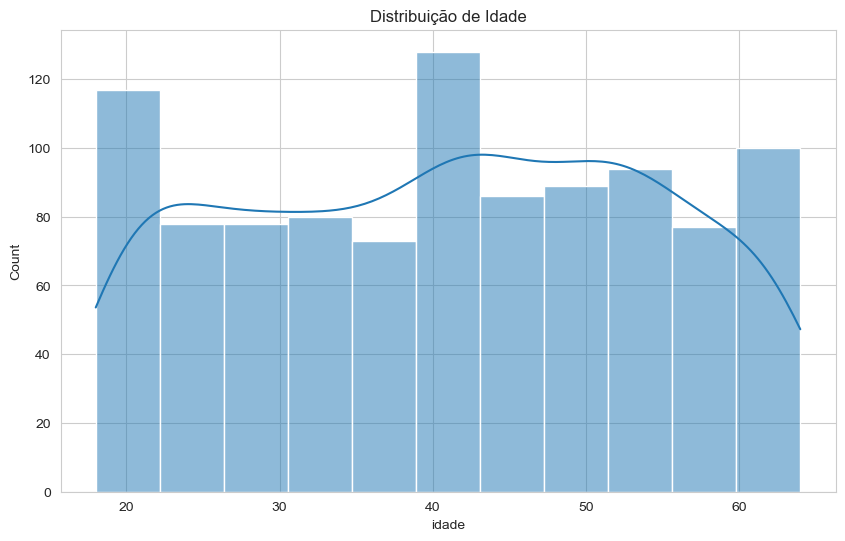

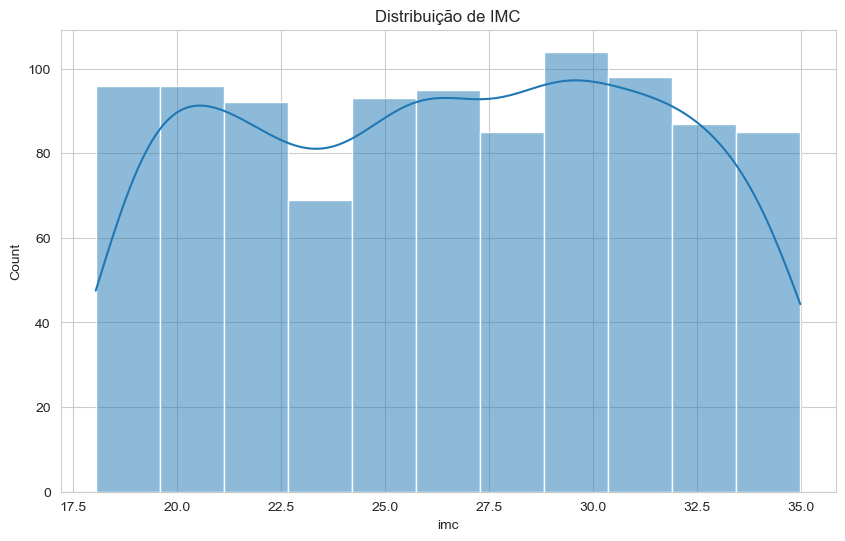

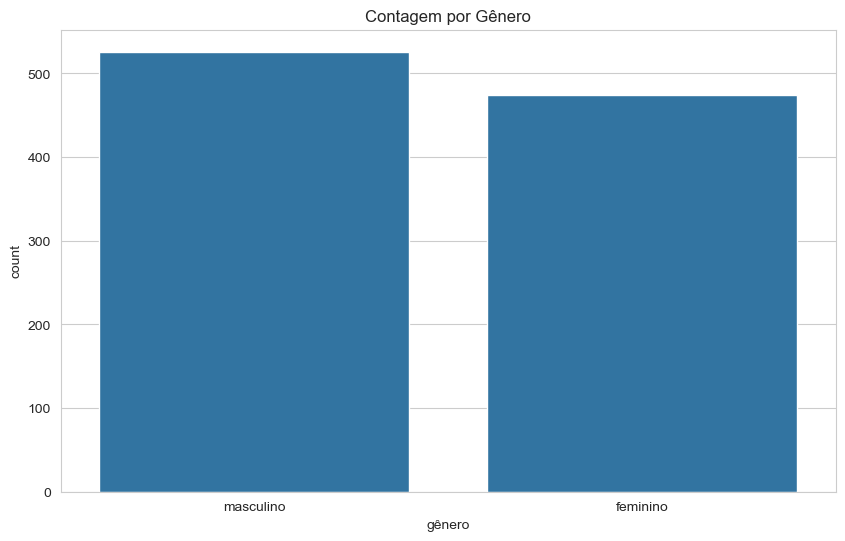

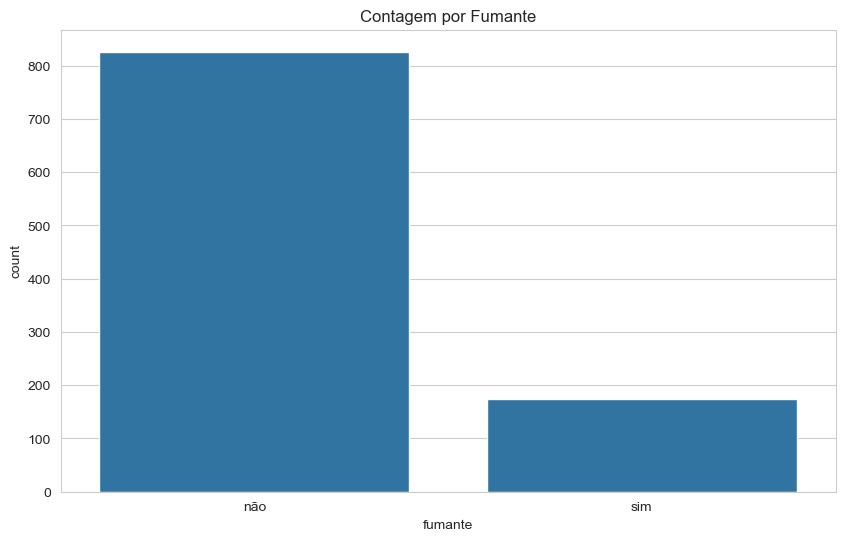

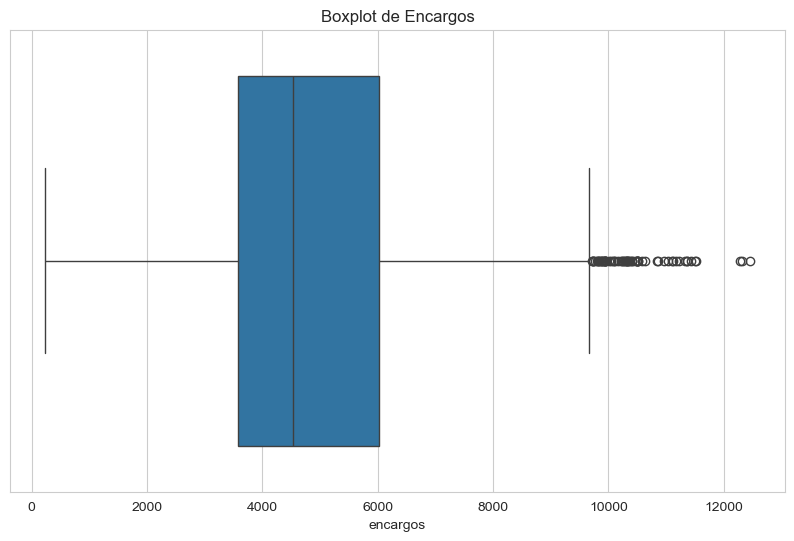

In [4]:
# Distribuição de idade
plt.figure()
sns.histplot(df['idade'], kde=True)
plt.title("Distribuição de Idade")
plt.show()

# Distribuição de IMC
plt.figure()
sns.histplot(df['imc'], kde=True)
plt.title("Distribuição de IMC")
plt.show()

# Contagem por Gênero
plt.figure()
sns.countplot(x='gênero', data=df)
plt.title("Contagem por Gênero")
plt.show()

# Contagem por Fumante
plt.figure()
sns.countplot(x='fumante', data=df)
plt.title("Contagem por Fumante")
plt.show()

# Boxplot encargos
plt.figure()
sns.boxplot(x='encargos', data=df)
plt.title("Boxplot de Encargos")
plt.show()

5) Pré-processamento de Dados

Verifiquei se existem valores ausentes, outliers e convertemos variáveis categóricas em formatos numéricos para o modelo.

In [5]:
# 5.1) Verificando valores ausentes
print("Valores Ausentes:")
display(df.isnull().sum())

# 5.2) Conversão de variáveis categóricas
# Exemplo de One-Hot Encoding para 'gênero', 'fumante' e 'região'
df_encoded = pd.get_dummies(df, columns=['gênero', 'fumante', 'região'], drop_first=True)

# Verificar resultado da codificação
display(df_encoded.head())

Valores Ausentes:


idade       0
gênero      0
imc         0
filhos      0
fumante     0
região      0
encargos    0
dtype: int64

,idade,imc,filhos,encargos,gênero_masculino,fumante_sim,região_nordeste,região_norte,região_sudeste,região_sul
0,56,29.616021,0,2726.21,True,False,True,False,False,False
1,46,25.580346,2,3915.42,False,False,False,False,False,True
2,32,22.651653,2,2943.22,False,False,False,True,False,False
3,60,34.951117,2,3590.03,False,False,False,True,False,False
4,25,25.245082,1,2586.77,True,False,False,False,True,False


6) Separação em Treino e Teste
Vamos separar o dataset em variáveis preditoras (X) e variável alvo (y).

In [6]:
# Considerando todas as colunas exceto 'encargos' como preditoras
X = df_encoded.drop('encargos', axis=1)
y = df_encoded['encargos']

# Divisão em dados de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
print("Formato X_train:", X_train.shape)
print("Formato X_test:", X_test.shape)
print("Formato y_train:", y_train.shape)
print("Formato y_test:", y_test.shape)

Formato X_train: (800, 9)
Formato X_test: (200, 9)
Formato y_train: (800,)
Formato y_test: (200,)


7) Modelagem

Neste exemplo, usaremos a Regressão Linear como modelo inicial.

In [7]:
# Criação do modelo
modelo_lr = LinearRegression()

# Treinamento do modelo
modelo_lr.fit(X_train, y_train)

# Coeficientes do modelo
print("Intercepto (b0):", modelo_lr.intercept_)
coeficientes = pd.DataFrame(modelo_lr.coef_, X_train.columns, columns=["Coeficiente"])
print("Coeficientes:")
display(coeficientes)

Intercepto (b0): 1992.1733872957943
Coeficientes:


,Coeficiente
idade,7.516009
imc,32.637147
filhos,530.450885
gênero_masculino,-60.758991
fumante_sim,4996.836945
região_nordeste,85.243134
região_norte,5.429231
região_sudeste,-11.897431
região_sul,-104.363509


8) Avaliação do Modelo

Calculamos métricas como MAE, MSE e R² no conjunto de teste.
Também podemos fazer gráficos de comparação entre valores reais e previstos.

Mean Absolute Error (MAE): 745.2301256331979
Mean Squared Error (MSE): 904715.4611382374
Root Mean Squared Error (RMSE): 951.1653174597134
R² (coeficiente de determinação): 0.8207666450363523


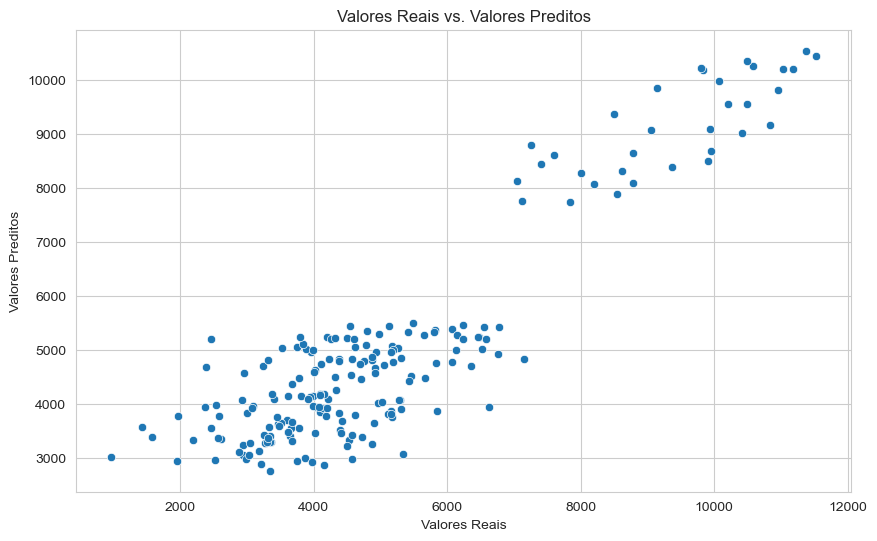

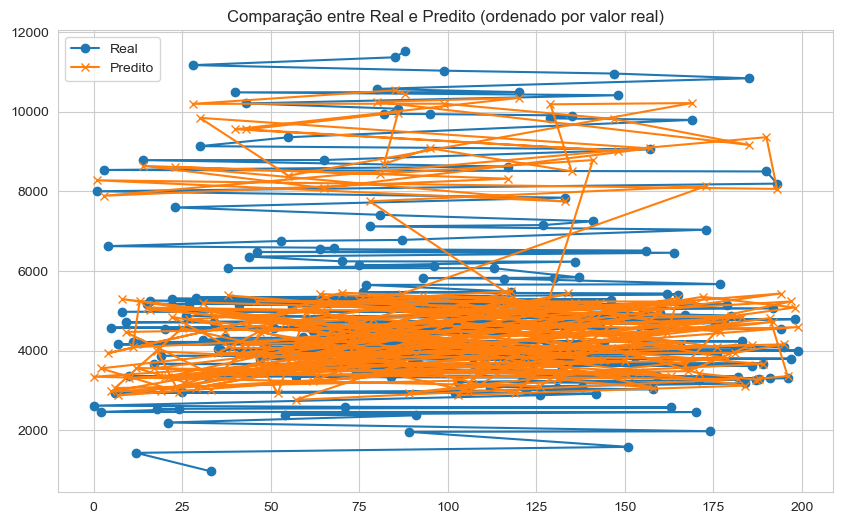

In [8]:
# Fazendo previsões
y_pred = modelo_lr.predict(X_test)

# Cálculo das métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² (coeficiente de determinação):", r2)

# Gráfico de valores reais vs. valores previstos
plt.figure()
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Valores Reais vs. Valores Preditos")
plt.show()

# Podemos também plotar a linha de melhor ajuste
# Criando um DataFrame temporário para plot
df_plot = pd.DataFrame({'Real': y_test, 'Predito': y_pred})
df_plot = df_plot.reset_index(drop=True).sort_values(by='Real')

plt.figure()
plt.plot(df_plot['Real'], label='Real', marker='o')
plt.plot(df_plot['Predito'], label='Predito', marker='x')
plt.legend()
plt.title("Comparação entre Real e Predito (ordenado por valor real)")
plt.show()

9) Validação Estatística

In [11]:
import statsmodels.api as sm

# Converter colunas booleanas para inteiros
X_train = X_train.astype(int)

# Adicionar constante para o intercepto
X_train_const = sm.add_constant(X_train)

# Criar e ajustar o modelo
modelo_sm = sm.OLS(y_train, X_train_const).fit()

# Exibir o resumo do modelo
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               encargos   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     381.7
Date:                Tue, 21 Jan 2025   Prob (F-statistic):          1.16e-280
Time:                        21:12:46   Log-Likelihood:                -6645.5
No. Observations:                 800   AIC:                         1.331e+04
Df Residuals:                     790   BIC:                         1.336e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2020.6062    232.398  